In [1]:
import pandas as pd
import numpy as np
import seaborn as sns                       
import matplotlib.pyplot as plt

In [2]:
df= pd.read_excel('Web.xlsx')
df

,name,year,wins,losses,ot-losses,pct,gf,ga,diff
0,Boston Bruins,1990,44,24,NaN,0.550,299,264,35
1,Buffalo Sabres,1990,31,30,NaN,0.388,292,278,14
2,Calgary Flames,1990,46,26,NaN,0.575,344,263,81
3,Chicago Blackhawks,1990,49,23,NaN,0.613,284,211,73
4,Detroit Red Wings,1990,34,38,NaN,0.425,273,298,-25
...,...,...,...,...,...,...,...,...,...
577,Tampa Bay Lightning,2011,38,36,8.0,0.463,235,281,-46
578,Toronto Maple Leafs,2011,35,37,10.0,0.427,231,264,-33
579,Vancouver Canucks,2011,51,22,9.0,0.622,249,198,51
580,Washington Capitals,2011,42,32,8.0,0.512,222,230,-8


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 582 entries, 0 to 581
Data columns (total 9 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   name       582 non-null    object 
 1   year       582 non-null    int64  
 2   wins       582 non-null    int64  
 3   losses     582 non-null    int64  
 4   ot-losses  358 non-null    float64
 5   pct        582 non-null    float64
 6   gf         582 non-null    int64  
 7   ga         582 non-null    int64  
 8   diff       582 non-null    int64  
dtypes: float64(2), int64(6), object(1)
memory usage: 41.1+ KB


In [4]:
df.shape

(582, 9)

In [5]:
print(df.isnull().sum())

name           0
year           0
wins           0
losses         0
ot-losses    224
pct            0
gf             0
ga             0
diff           0
dtype: int64


In [6]:
df = df.dropna()
df.count()

name         358
year         358
wins         358
losses       358
ot-losses    358
pct          358
gf           358
ga           358
diff         358
dtype: int64

In [7]:
print(df.isnull().sum()) 

name         0
year         0
wins         0
losses       0
ot-losses    0
pct          0
gf           0
ga           0
diff         0
dtype: int64


In [8]:
duplicate_rows_df = df[df.duplicated()]
print("number of duplicate rows: ", duplicate_rows_df.shape)

number of duplicate rows:  (0, 9)


In [9]:
df.describe()

,year,wins,losses,ot-losses,pct,gf,ga,diff
count,358.000000,358.000000,358.000000,358.000000,358.000000,358.000000,358.000000,358.000000
mean,2005.117318,38.837989,31.377095,7.460894,0.473609,228.511173,228.511173,0.000000
std,3.872286,8.067399,7.244450,3.610191,0.098400,26.921270,29.670433,41.202377
min,1999.000000,14.000000,15.000000,0.000000,0.171000,164.000000,164.000000,-143.000000
25%,2002.000000,34.000000,27.000000,5.000000,0.415000,211.000000,207.250000,-28.000000
50%,2006.000000,40.000000,30.000000,7.000000,0.488000,227.000000,227.000000,4.000000
75%,2008.750000,44.000000,36.000000,10.000000,0.537000,246.750000,248.000000,27.750000
max,2011.000000,58.000000,57.000000,18.000000,0.707000,318.000000,316.000000,103.000000


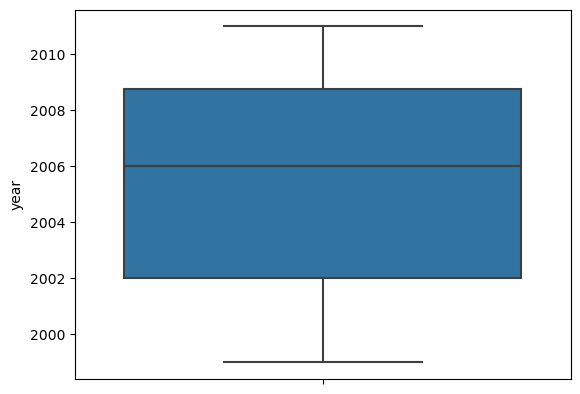

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

In [11]:
sns.boxplot(data=df,y='year')
plt.show()
plt.figure(figsize=(20,20))

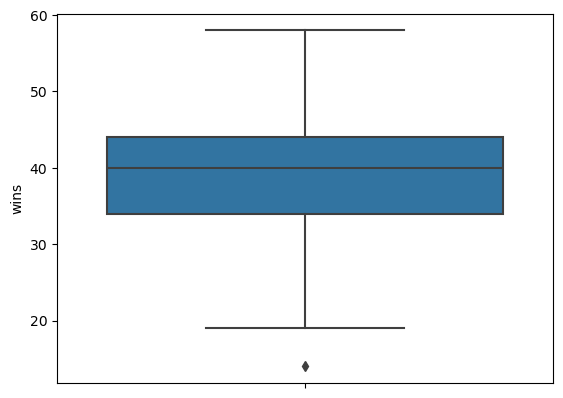

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

In [13]:
sns.boxplot(data=df,y='wins')
plt.show()
plt.figure(figsize=(20,20))

In [21]:
seventy_fifth=df['wins'].quantile(0.75)
# 25th percentile
twenty_fifth=df['wins'].quantile(0.25)
#Interquartile range
profit_IQR=seventy_fifth-twenty_fifth
print(profit_IQR)

10.0


In [22]:
# Upper threshold
upper = seventy_fifth + (1.5 * profit_IQR)
# Lower threshold
lower = twenty_fifth - (1.5 * profit_IQR)
print(upper, lower)

59.0 19.0


In [23]:
df1=df[(df['wins']>lower) & (df['wins'] <upper)]

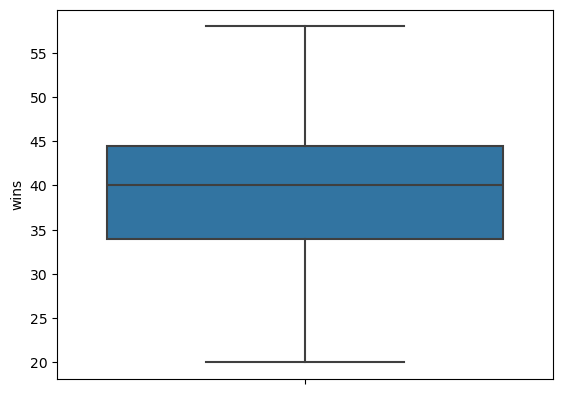

<Figure size 400x400 with 0 Axes>

In [24]:
sns.boxplot(data=df1,y='wins')
plt.figure(figsize=(4,4))
plt.show()

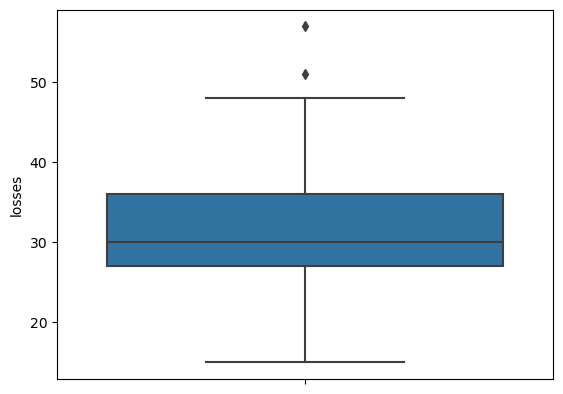

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

In [14]:
sns.boxplot(data=df,y='losses')
plt.show()
plt.figure(figsize=(20,20))

In [25]:
seventy_fifth=df['losses'].quantile(0.75)
# 25th percentile
twenty_fifth=df['losses'].quantile(0.25)
#Interquartile range
profit_IQR=seventy_fifth-twenty_fifth
print(profit_IQR)

9.0


In [26]:
# Upper threshold
upper = seventy_fifth + (1.5 * profit_IQR)
# Lower threshold
lower = twenty_fifth - (1.5 * profit_IQR)
print(upper, lower)

49.5 13.5


In [27]:
df1=df[(df['losses']>lower) & (df['losses'] <upper)]

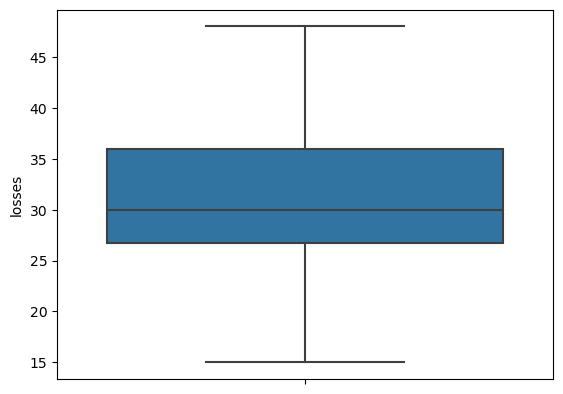

<Figure size 400x400 with 0 Axes>

In [28]:
# boxplot after removing outliers
sns.boxplot(data=df1,y='losses')
plt.figure(figsize=(4,4))
plt.show()

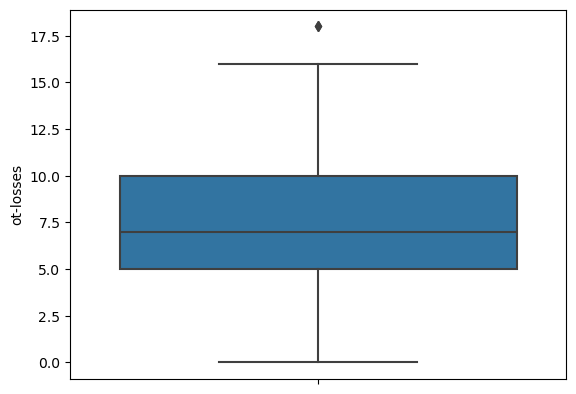

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

In [15]:
sns.boxplot(data=df,y='ot-losses')
plt.show()
plt.figure(figsize=(20,20))

In [35]:
seventy_fifth=df['ot-losses'].quantile(0.75)
# 25th percentile
twenty_fifth=df['ot-losses'].quantile(0.25)
#Interquartile range
profit_IQR=seventy_fifth-twenty_fifth
print(profit_IQR)

5.0


In [36]:
# Upper threshold
upper = seventy_fifth + (1.5 * profit_IQR)
# Lower threshold
lower = twenty_fifth - (1.5 * profit_IQR)
print(upper, lower)

17.5 -2.5


In [37]:
df1=df[(df['ot-losses']>lower) & (df['ot-losses'] <upper)]

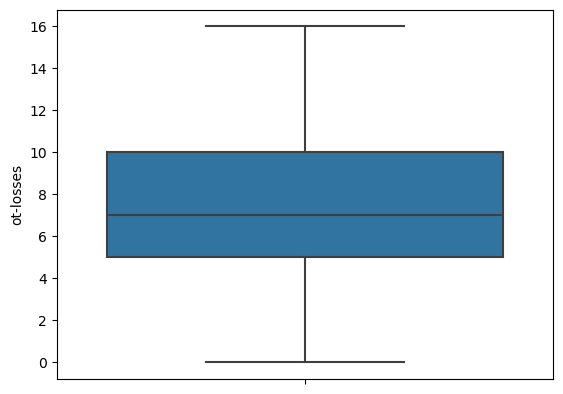

<Figure size 400x400 with 0 Axes>

In [38]:
# boxplot after removing outliers
sns.boxplot(data=df1,y='ot-losses')
plt.figure(figsize=(4,4))
plt.show()

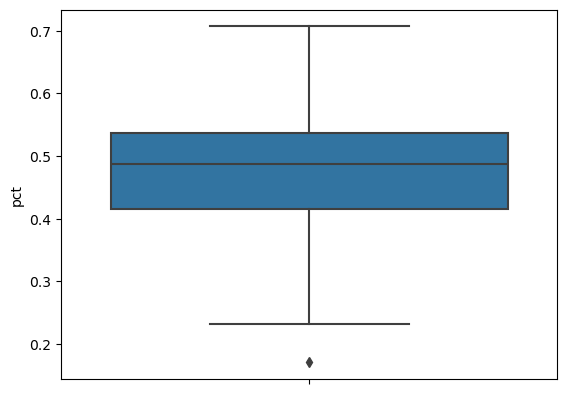

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

In [16]:
sns.boxplot(data=df,y='pct')
plt.show()
plt.figure(figsize=(20,20))

In [39]:
seventy_fifth=df['pct'].quantile(0.75)
# 25th percentile
twenty_fifth=df['pct'].quantile(0.25)
#Interquartile range
profit_IQR=seventy_fifth-twenty_fifth
print(profit_IQR)

0.12200000000000005


In [40]:
# Upper threshold
upper = seventy_fifth + (1.5 * profit_IQR)
# Lower threshold
lower = twenty_fifth - (1.5 * profit_IQR)
print(upper, lower)

0.7200000000000001 0.2319999999999999


In [42]:
df1=df[(df['pct']>lower) & (df['pct'] <upper)]

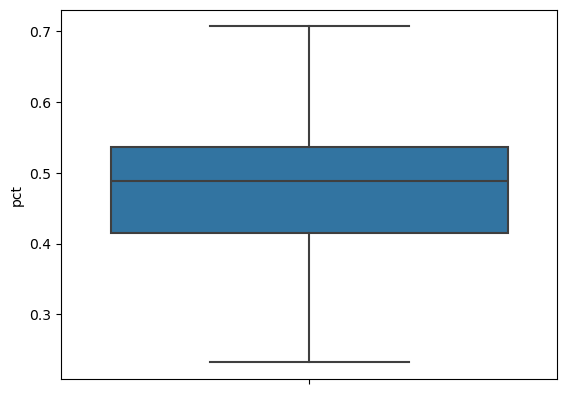

<Figure size 400x400 with 0 Axes>

In [43]:
# boxplot after removing outliers
sns.boxplot(data=df1,y='pct')
plt.figure(figsize=(4,4))
plt.show()

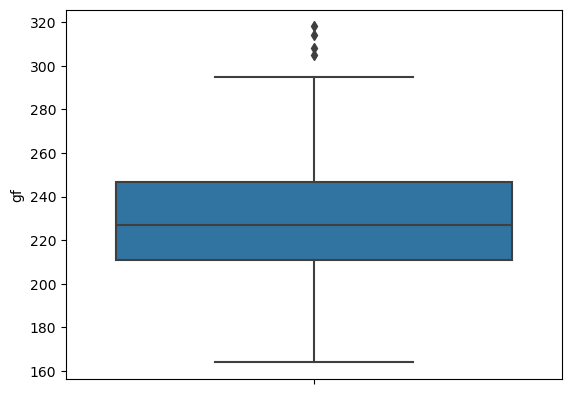

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

In [17]:
sns.boxplot(data=df,y='gf')
plt.show()
plt.figure(figsize=(20,20))

In [44]:
seventy_fifth=df['gf'].quantile(0.75)
# 25th percentile
twenty_fifth=df['gf'].quantile(0.25)
#Interquartile range
profit_IQR=seventy_fifth-twenty_fifth
print(profit_IQR)

35.75


In [45]:
# Upper threshold
upper = seventy_fifth + (1.5 * profit_IQR)
# Lower threshold
lower = twenty_fifth - (1.5 * profit_IQR)
print(upper, lower)

300.375 157.375


In [46]:
df1=df[(df['gf']>lower) & (df['gf'] <upper)]

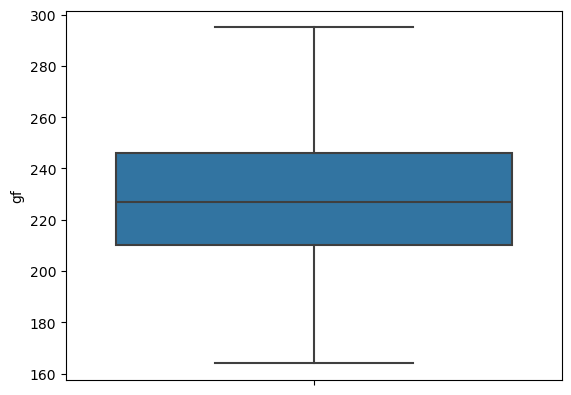

<Figure size 400x400 with 0 Axes>

In [47]:
sns.boxplot(data=df1,y='gf')
plt.figure(figsize=(4,4))
plt.show()

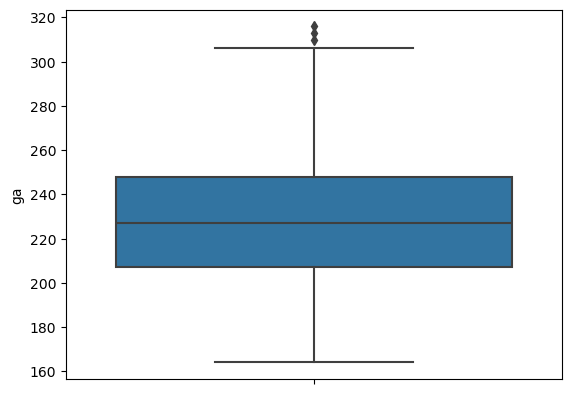

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

In [18]:
sns.boxplot(data=df,y='ga')
plt.show()
plt.figure(figsize=(20,20))

In [48]:
seventy_fifth=df['ga'].quantile(0.75)
# 25th percentile
twenty_fifth=df['ga'].quantile(0.25)
#Interquartile range
profit_IQR=seventy_fifth-twenty_fifth
print(profit_IQR)

40.75


In [49]:
# Upper threshold
upper = seventy_fifth + (1.5 * profit_IQR)
# Lower threshold
lower = twenty_fifth - (1.5 * profit_IQR)
print(upper, lower)

309.125 146.125


In [50]:
df1=df[(df['ga']>lower) & (df['ga'] <upper)]

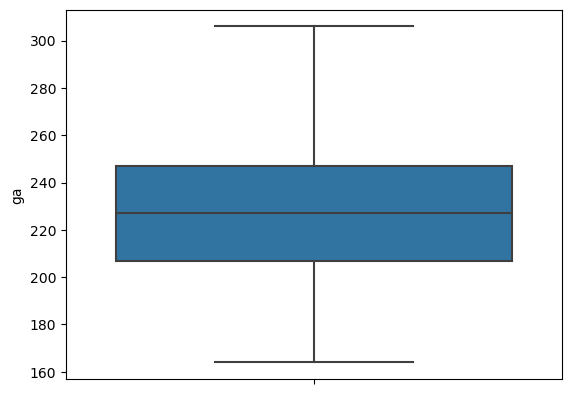

<Figure size 400x400 with 0 Axes>

In [51]:
# boxplot after removing outliers
sns.boxplot(data=df1,y='ga')
plt.figure(figsize=(4,4))
plt.show()

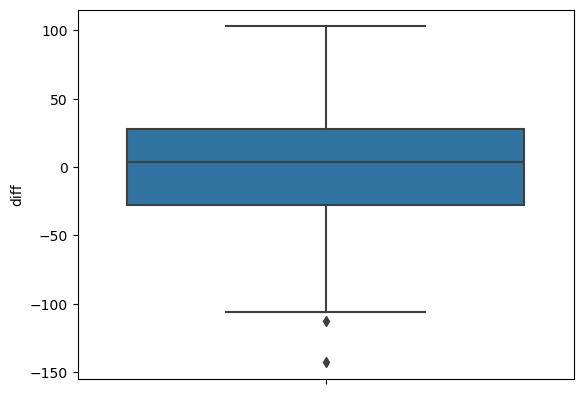

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

In [19]:
sns.boxplot(data=df,y='diff')
plt.show()
plt.figure(figsize=(20,20))

In [52]:
seventy_fifth=df['diff'].quantile(0.75)
# 25th percentile
twenty_fifth=df['diff'].quantile(0.25)
#Interquartile range
profit_IQR=seventy_fifth-twenty_fifth
print(profit_IQR)

55.75


In [53]:
# Upper threshold
upper = seventy_fifth + (1.5 * profit_IQR)
# Lower threshold
lower = twenty_fifth - (1.5 * profit_IQR)
print(upper, lower)

111.375 -111.625


In [54]:
df1=df[(df['diff']>lower) & (df['diff'] <upper)]

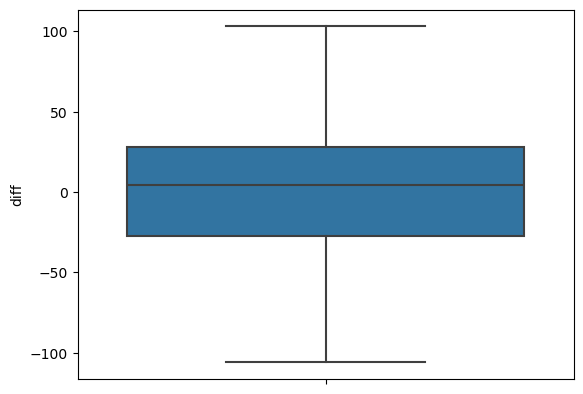

<Figure size 400x400 with 0 Axes>

In [55]:
# boxplot after removing outliers
sns.boxplot(data=df1,y='diff')
plt.figure(figsize=(4,4))
plt.show()

# Statistical Analysis

In [56]:
import scipy.stats as stats
import numpy as np

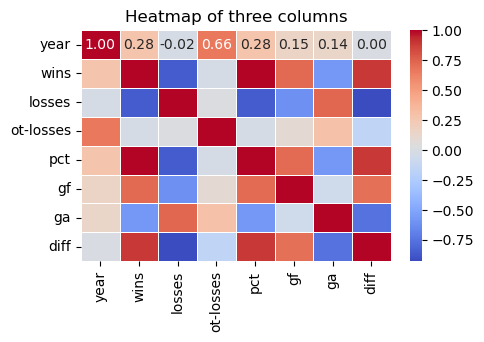

In [60]:
# select specfic columns
selected_columns =['year','wins','losses','ot-losses','pct','gf','ga','diff']
df_selected = df[selected_columns]

#compute the correlation matrix(if needed)
correlation_matrix = df_selected.corr()

#plot the heatmap
plt.figure(figsize=(5,3))
sns.heatmap(correlation_matrix,annot=True,cmap='coolwarm',linewidth=.5,fmt='.2f')
plt.title('Heatmap of three columns')
plt.show()

In [64]:
from scipy.stats import ttest_ind

# T-test
#pvalue = 0.05
t_stat, p_value = ttest_ind(df['ot-losses'], df['losses'])
print(f'T-test statistic: {t_stat}, p-value: {p_value}')

T-test statistic: -55.90640629109821, p-value: 5.042208851656008e-263


# Inference 
H0 = The Mean values ot-losses and losses are equal
H1= The Mean values of ot-losses and losses not equal 
Results: 
-We have enough evidence to reject null Hypothesis[Low p-value]



In [67]:
df =pd.DataFrame(df)

In [68]:
df.to_csv('Web_Scarping.csv')
df

,name,year,wins,losses,ot-losses,pct,gf,ga,diff
224,Mighty Ducks of Anaheim,1999,34,33,3.0,0.415,217,227,-10
225,Atlanta Thrashers,1999,14,57,4.0,0.171,170,313,-143
226,Boston Bruins,1999,24,33,6.0,0.293,210,248,-38
227,Buffalo Sabres,1999,35,32,4.0,0.427,213,204,9
228,Calgary Flames,1999,31,36,5.0,0.378,211,256,-45
...,...,...,...,...,...,...,...,...,...
577,Tampa Bay Lightning,2011,38,36,8.0,0.463,235,281,-46
578,Toronto Maple Leafs,2011,35,37,10.0,0.427,231,264,-33
579,Vancouver Canucks,2011,51,22,9.0,0.622,249,198,51
580,Washington Capitals,2011,42,32,8.0,0.512,222,230,-8
